<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Regression method to predict Compressive Concrete Strength

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Applying Models](#section4)<br>
    - 4.1 [Dividing Dependent And Independent Variables](#section403)<br>
    - 4.2 [Splitting the data](#section404)<br>
    - 4.3 [Feature Scaling](#section406)<br>
    - 4.4 [Using the Model for Prediction](#section407)<br>


<a id=section1></a>

### __1. Problem Statement__

Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. The Compressive Strength of Concrete is a highly nonlinear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.

This notebook demonstrates the use of Machine Learning to predict Concrete Compressive Strength.

Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.

 We have to predict the compressive strength 'csMPa'.

### __2. Data Loading and Description__

Number of instances - 1030

Number of Attributes - Train 10 , Test 9
 
Attribute information

Inputs
- Cement
- Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate

All above features measured in kg/m3

- Age (in days)

Output
- Concrete Compressive Strength (csMpa)
 

The dataset is divided into two parts: Train and Test sets.

- Train Set:
    - The train set contains 824 rows and 10 columns.
    - The last column csMPa is the target variable.

-  Test Set:
  -  The test set contains 206 rows and 9 columns.
  -The test set doesn’t contain the csMPa column.
It needs to be predicted for the test set.
    

The Dataset contains the following columns:

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
Id|Unique identity of each observation.|
cement|Quantity of cement in the mixture in kg(kilogram).|
slag|Quantity of cement in the mixture in kg(kilogram).|
Flyash|Quantity of fly ash in the mixture in kg(kilogram).|
water|Quantity of water in the mixture in kg(kilogram).|
superplasticizer|Quantity of superplasticizer in the mixture in kg(kilogram).|
coarseaggregate|Quantity of coarse aggregate in the mixture in kg(kilogram).|
fineaggregate|Quantity of fine aggregate in the mixture in kg(kilogram).|
age|Age of the mixture in days.|
csMPa|compressive strength of concrete in MPa(dependent variable).|



### Importing packages                                          

In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", warn=False)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

### Importing the Dataset

In [3]:
# Reading Train and Test data Separately
df = pd.read_csv("https://raw.githubusercontent.com/sreeman-maddineni/Concrete_Compressive_Strength_Pred_ML/main/concrete_train.csv")     # Importing training dataset using pd.read_csv
df_test  = pd.read_csv("https://raw.githubusercontent.com/sreeman-maddineni/Concrete_Compressive_Strength_Pred_ML/main/concrete_test.csv")     # Importing 

In [4]:
df.head(3)

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
1,507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
2,334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80


### Study Dataset

In [5]:
df.shape

(824, 10)

In [6]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                824 non-null    int64  
 1   cement            824 non-null    float64
 2   slag              824 non-null    float64
 3   flyash            824 non-null    float64
 4   water             824 non-null    float64
 5   superplasticizer  824 non-null    float64
 6   coarseaggregate   824 non-null    float64
 7   fineaggregate     824 non-null    float64
 8   age               824 non-null    int64  
 9   csMPa             824 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 64.5 KB


**Observation:**

Here we notice that the count of not null values in each feature and see what is the data type of features present in the dataset.

In [7]:
df.describe()

,Id,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,513.847087,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,296.786779,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,251.750000,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,513.500000,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,770.250000,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,1028.000000,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
cwo=((df.iloc[:] <(q1-1.5*IQR))|(df.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=df.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(df),2)
opdf

,No. of Outliers,Percentage Outliers
Id,0,0.00
cement,0,0.00
slag,0,0.00
flyash,0,0.00
water,9,1.09
superplasticizer,8,0.97
coarseaggregate,0,0.00
fineaggregate,4,0.49
age,44,5.34
csMPa,9,1.09


### Profiling

In [9]:
#!pip3 install pandas_profiling --upgrade

In [10]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file(output_file="avocado_before_preprocessing.html")

 

## __3. Preprocessing the data__

- Dealing with missing values<br/>
    - Dropping missing entries
    - Replacing missing values
    - Dropping the columns

In [11]:
df.duplicated().sum()

0

**Observation:**

- Dataset does not have any duplicated and missing values.

In [12]:
df.isna().sum()

Id                  0
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

**Observation:**
- We can see that no missing values exist in dataset

In [13]:
# divide the DS into numerical , categorical
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds = df.select_dtypes(exclude=numerics) # all categorical datatypes

In [14]:
#Copying ID as Backup before dropping
df_ID=df[['Id']].copy()

df=df.drop('Id',axis=1)


### Doing Same Procedure on Test Data

In [15]:
df_test.duplicated().sum()

0

In [16]:
# divide the DS into numerical , categorical
numeric_ds_test = df_test.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds_test = df_test.select_dtypes(exclude=numerics) # all categorical datatypes

In [17]:
df_test_ID=df_test[['Id']].copy()

df_test=df_test.drop('Id',axis=1)

## __EDA__

Doing EDA on Train data


###Dist Plot:

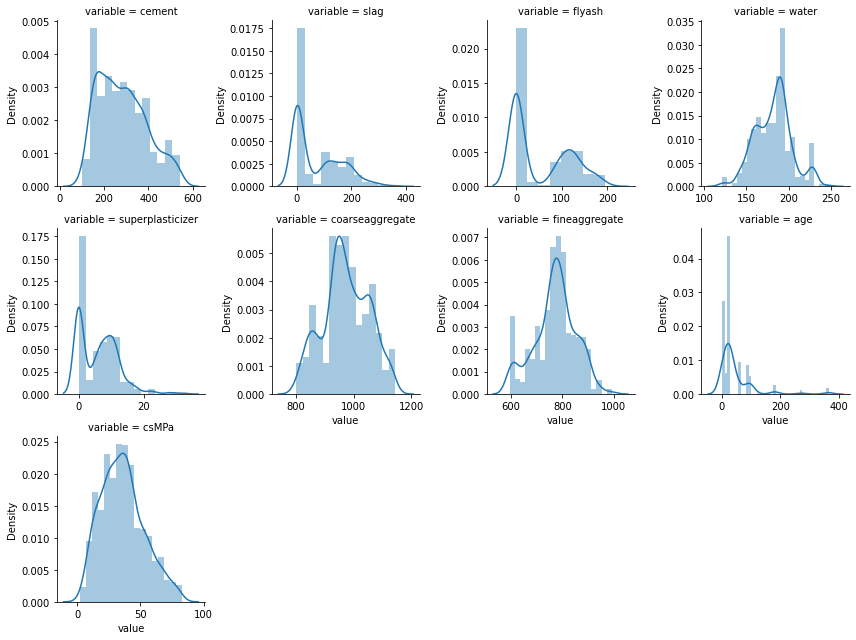

In [18]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

**Observation:**

- cement is almost normal.
- slag has three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.

###Box Plot:

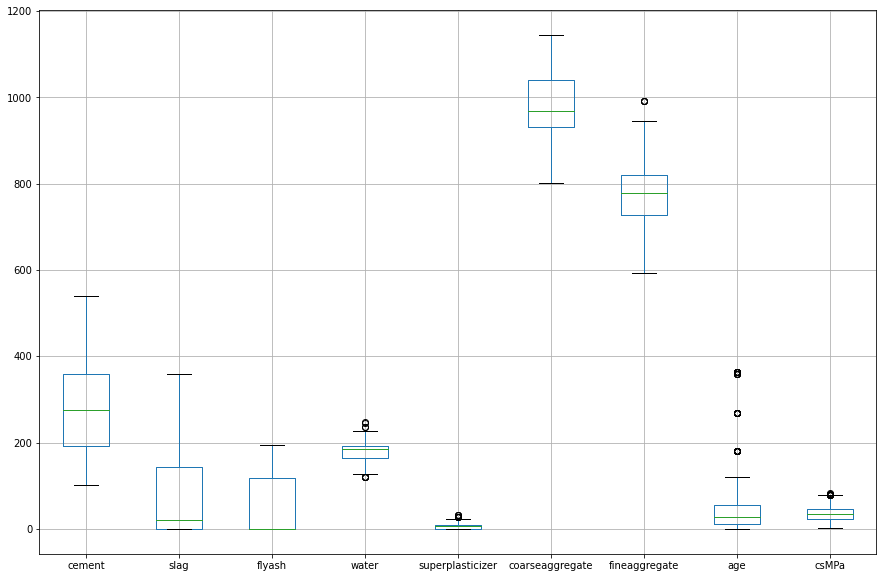

In [19]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

**Observation:**  
Outliers are present in some fields age,superplasticizer,water.

###Pair Plot:

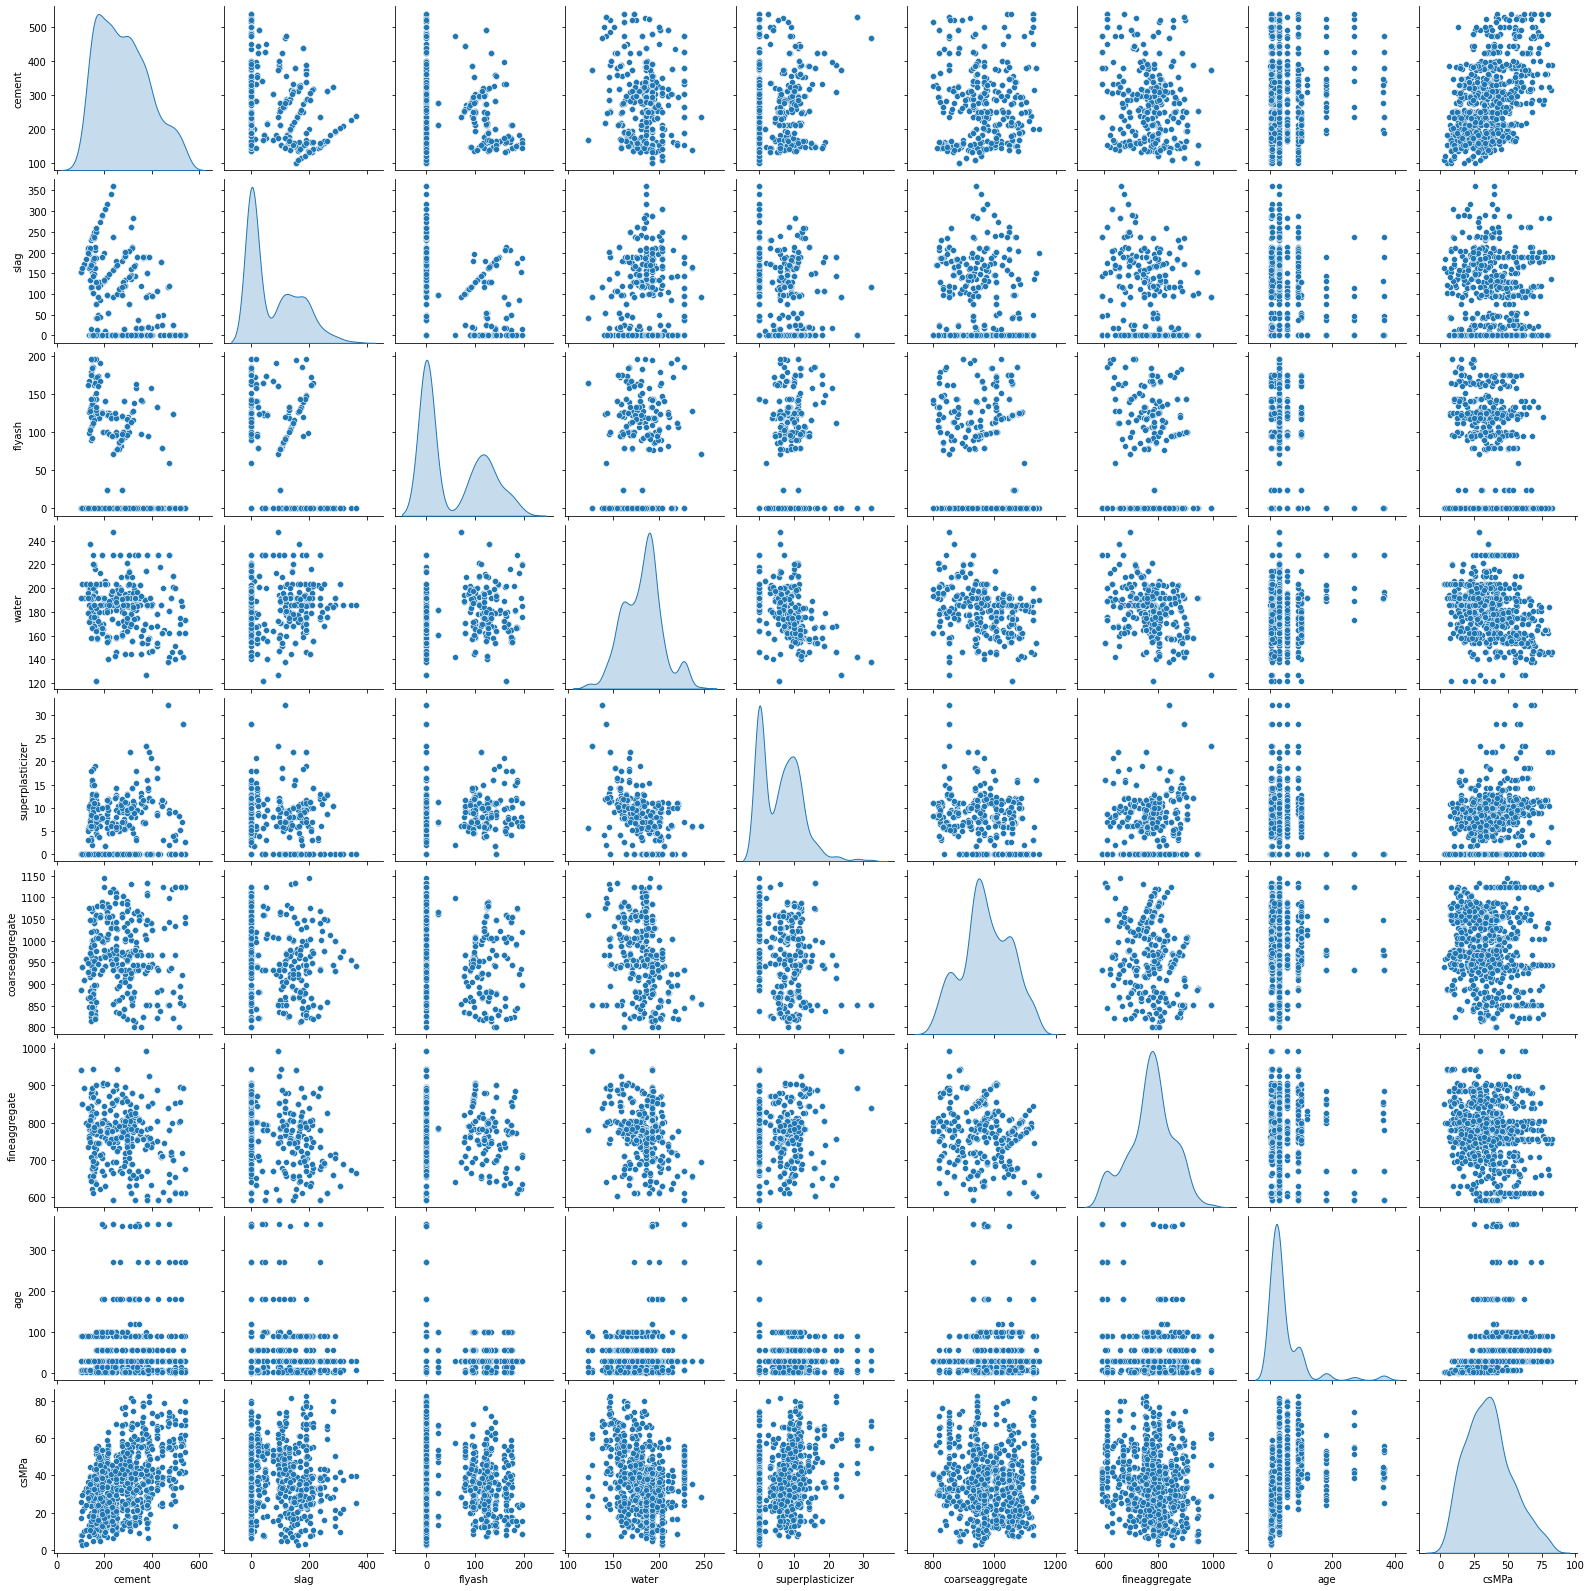

In [20]:
# pairplot of dataframe
#sns.pairplot( df )
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(df, diag_kind='kde')  

**Observation:** 

Diagonals Analysis

- The diagonal gives the same information, we got using distplot.
- cement attribute have almost normal curve.
- slag has two gausssians and rightly skewed.It shows the presence of outlies.
- ash has two gaussians and rightly skewed.It shows the presence of outlies.
- water has atleast guassians and slighly left skewed.It shows the presence of outlies.
- superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed. It shows the presence of outlies.
- strength is close to a normal curve.
- We not only have missing values problem but also outliers problem in the dataset.

Relationship between independant attributes

- cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
- superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
- coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
- fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

In [21]:
# corrlation matrix 
cor=df.corr()
cor

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.292444,-0.408276,-0.079575,0.077144,-0.089068,-0.228866,0.097599,0.496686
slag,-0.292444,1.000000,-0.315814,0.091486,0.055439,-0.287732,-0.251896,-0.051612,0.155159
flyash,-0.408276,-0.315814,1.000000,-0.246652,0.365800,0.000601,0.069946,-0.156821,-0.149749
water,-0.079575,0.091486,-0.246652,1.000000,-0.653785,-0.169772,-0.434564,0.260538,-0.284590
superplasticizer,0.077144,0.055439,0.365800,-0.653785,1.000000,-0.263028,0.217674,-0.180280,0.353292
coarseaggregate,-0.089068,-0.287732,0.000601,-0.169772,-0.263028,1.000000,-0.216624,-0.003823,-0.171612
fineaggregate,-0.228866,-0.251896,0.069946,-0.434564,0.217674,-0.216624,1.000000,-0.147267,-0.158425
age,0.097599,-0.051612,-0.156821,0.260538,-0.180280,-0.003823,-0.147267,1.000000,0.332074
csMPa,0.496686,0.155159,-0.149749,-0.284590,0.353292,-0.171612,-0.158425,0.332074,1.000000


**Observation:**

Here, we can see the correlation value between the attributes.


### Scatter Plot: Cement vs csMPa

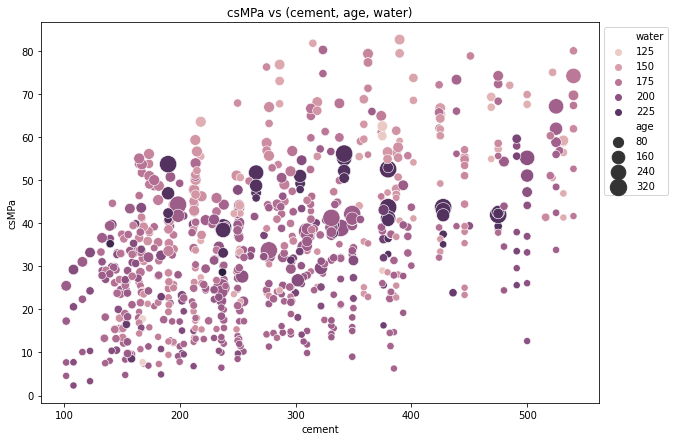

In [22]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300))
ax.set_title("csMPa vs (cement, age, water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**Observation:** 
- Compressive strength increases with amount of cement
- Compressive strength increases with age
- Cement with low age requires more cement for higher strength
- The older the cement is the more water it requires
- Concrete strength increases when less water is used in preparing it

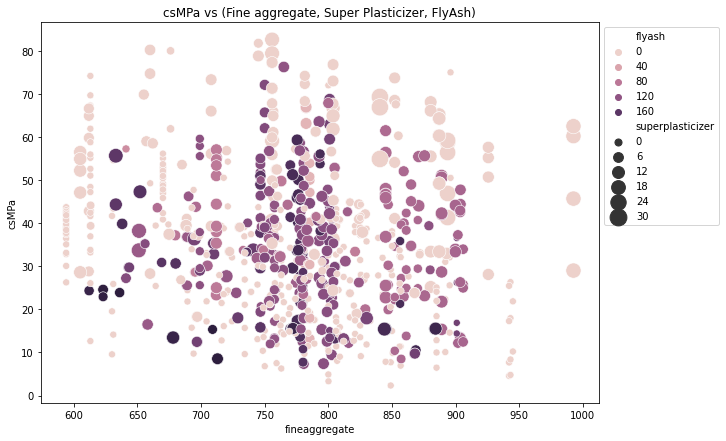

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("csMPa vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**Observation**:

- As Flyash increases the strength decreases
- Strength increases with Super plasticizer

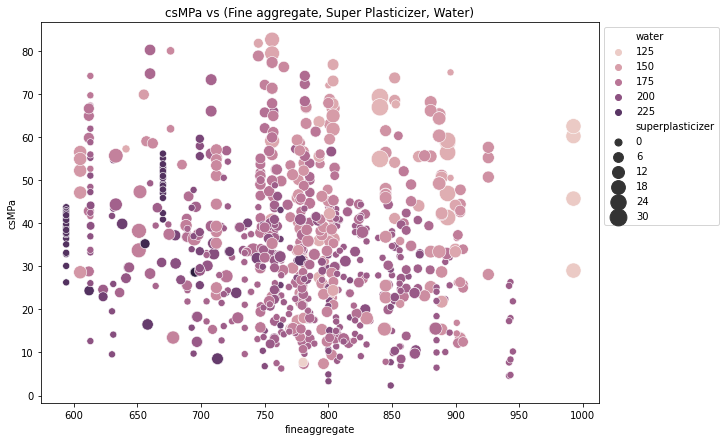

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="water", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("csMPa vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

**Observation:**

- Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
- More Fine aggregate is used when less water, more Super plasticizer is used.

### Correlation plot


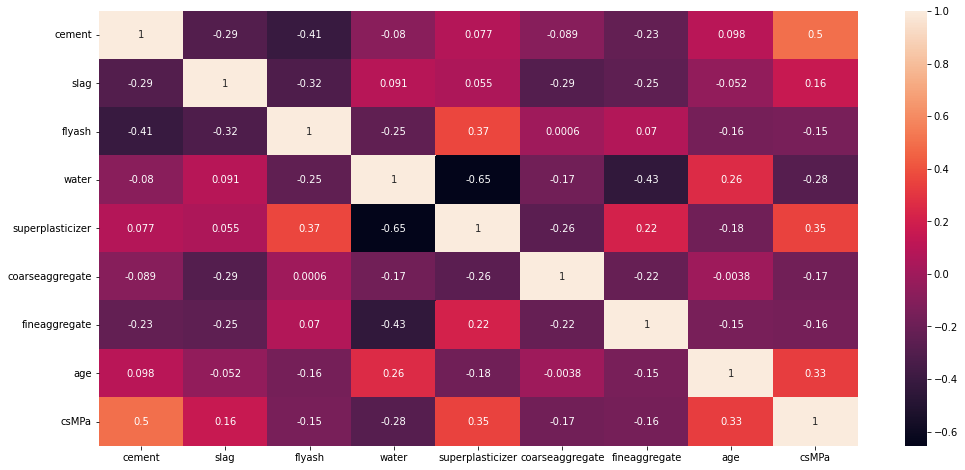

In [25]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sns.heatmap(df.corr(),annot=True)

**Observation:**


- There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.
- Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.
- Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.


## __Applying model__

In this step, we applying several machine learning algorithms to training data.
Until we find good model.
 

### Dividing Dependent And Independent Variables


- Now our data are ready! lets apply our model.
- We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

- Before starting model building we have to divide the dataset into two parts,

 - Independent variables contain a list of those variables in which concrete quality is dependent.
 - The dependent variable is that variable that is dependent on other variables’ values.

In [26]:
# independent variables
x = df.drop(['csMPa'],axis=1)
# dependent variables
y = df['csMPa'] 

### Splitting the data


In [27]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

###Feature Scaling

We do scaling of data for balancing the data points.

In [28]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

In [29]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(xtrain_scl, ytrain)
lasso.fit(xtrain_scl, ytrain)
ridge.fit(xtrain_scl, ytrain)

# Making predictions on Test data
y_pred_lr = lr.predict(xtest_scl)
y_pred_lasso = lasso.predict(xtest_scl)
y_pred_ridge = ridge.predict(xtest_scl)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_pred_lr)),mean_squared_error(ytest, y_pred_lr),
            mean_absolute_error(ytest, y_pred_lr), r2_score(ytest, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_pred_lasso)),mean_squared_error(ytest, y_pred_lasso),
            mean_absolute_error(ytest, y_pred_lasso), r2_score(ytest, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_pred_ridge)),mean_squared_error(ytest, y_pred_ridge),
            mean_absolute_error(ytest, y_pred_ridge), r2_score(ytest, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.96 		 120.03 	8.65 		0.60
LassoRegression 	 11.56 		 133.74 	9.29 		0.56
RidgeRegression 	 10.96 		 120.06 	8.66 		0.60


Plotting Predictions

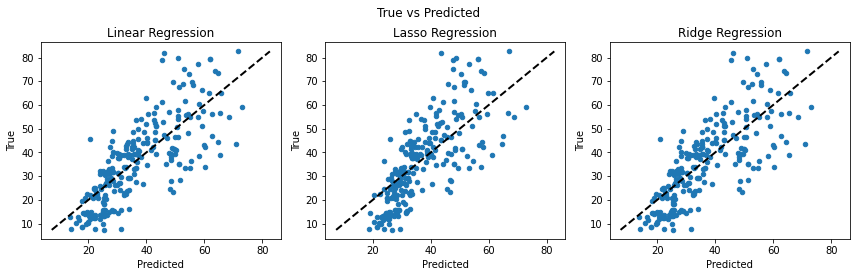

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, ytest, s=20)
ax1.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, ytest, s=20)
ax2.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, ytest, s=20)
ax3.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

We can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.34 		 53.88 		4.91 		0.82


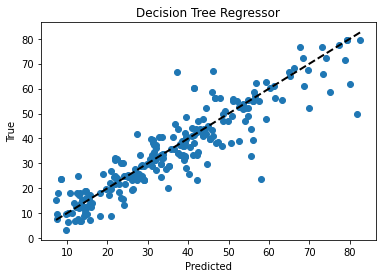

In [32]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(xtrain_scl, ytrain)

y_pred_dtr = dtr.predict(xtest_scl)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_pred_dtr)),mean_squared_error(ytest, y_pred_dtr),
            mean_absolute_error(ytest, y_pred_dtr), r2_score(ytest, y_pred_dtr)))

plt.scatter(ytest, y_pred_dtr)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

The Root Mean Squared Error (RMSE) has come down from 10.96 to around 7.08, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are on the line.

###Random Forest Regressor

Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.70 		 32.53 		3.93 		0.89


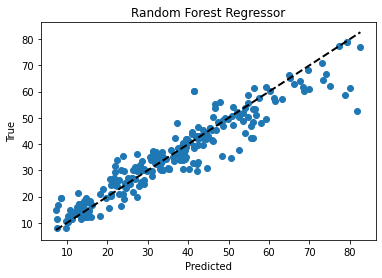

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(xtrain_scl, ytrain)

y_pred_rfr = rfr.predict(xtest_scl)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_pred_rfr)),mean_squared_error(ytest, y_pred_rfr),
            mean_absolute_error(ytest, y_pred_rfr), r2_score(ytest, y_pred_rfr)))

plt.scatter(ytest, y_pred_rfr)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

The RMSE with Random Forest Regressor is now around 5.58, we have reduced the error by ensembling multiple trees.

Lets Compare all algorithms

In [34]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

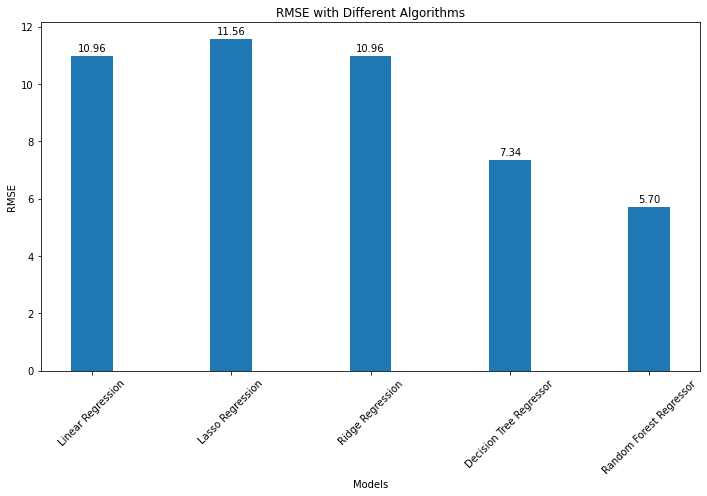

In [35]:
models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(ytest, model.predict(xtest_scl))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

**Conclusion:**

Random Forest Regressor is the best choice for this problem.


- The accuracy score of RandomForestRegressor is highest among linear, lasso, and ridge regression, so we use the RandomForestRegressor model. 
- Here the highest accuracy means it predicts the quality of concert by using training, which contains independent variables, and also it gives less error rate.

In [36]:
x_predict = list(rfr.predict(xtest))
predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
#creating new dataframe
#pd.DataFrame(predicted_df).head(10)

In [37]:
pred_op = list(rfr.predict(df_test))

In [38]:
test_predictions = df_test_ID

In [39]:
test_predictions['predicted']=pred_op

In [40]:
test_predictions.to_csv('submission.csv', index=False, header=False)

In [41]:
#import pickle
#file = 'concrete_strength'
#save = pickle.dump(rnd,open(file,'wb'))

##**Conclusions**

We have analysed the Compressive Strength Data and used Machine Learning to Predict the Compressive Strength of Concrete. We have used Linear Regression and its variations, Decision Trees and Random Forests to make predictions and compared their performance. Random Forest Regressor has the lowest RMSE and is a good choice for this problem. Also, we can further improve the performance of the algorithm by tuning the hyperparameters by performing a grid search or random search.

This study shows the reflection of various ML techniques for the predictive perspective. It gives the better understanding to the researcher in the field of engineering that the better selection of the input parameters and regressor to run the model would results in the accurate predicted outcomes. 

Higher accuracy level of the models indicates the importance of their use in the field of civil engineering, especially when it comes to predict the strength properties of concrete, because practically it is time consuming task to have a strength result of the concrete. 

This approach is now minimizing the time and physical activities.